In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./music_genre.csv')
print(data.shape)
data.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
data.music_genre.unique()

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

## Preprocessing Data

In [4]:
df = data.copy()

In [5]:
# drop 'instance_id', 'track_name', 'obtained_date', 'artist_name' columns
df.drop(columns=['instance_id', 'track_name', 'obtained_date', 'artist_name'], axis=1, inplace=True)
print(df.shape)
df.head()

(50005, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [6]:
# convert columns to float
for col in df.columns.difference(['key', 'mode','music_genre']):
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
df[df.columns.difference(['key', 'mode','music_genre'])].astype("float")
print(df.shape)
df.head()

(50005, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [7]:
# encode 'key' column
key_encoder = LabelEncoder()
df["key"] = key_encoder.fit_transform(df["key"])

# encode 'mode' column
mode_encoder = LabelEncoder()
df["mode"] = mode_encoder.fit_transform(df["mode"])

print(df.shape)
df.head()

(50005, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,Electronic


In [8]:
# drop rows with misleading values
df.drop(df[df["duration_ms"] <= 0].index, inplace=True)
df.reset_index(inplace = True)

# drop 'music_genre', 'index' columns
df.drop(columns=['music_genre','index'], axis=1, inplace=True)
df['loudness'] = df['loudness'] - df['loudness'].min()

print(df.shape)
df.head()

(45066, 13)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,40.003,1,0.0300,115.002,0.531
1,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,42.429,0,0.0345,127.994,0.333
2,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,42.548,0,0.2390,128.014,0.270
3,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,40.780,0,0.0413,145.036,0.323
4,47.0,0.00523,0.755,519468.0,0.731,0.85400,5,0.216,36.529,1,0.0412,NaN,0.614


In [9]:
# apply logarithm to columns
df = df.apply(lambda x: np.log1p(x))
print(df.shape)
df.head()

(45066, 13)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,3.465736,0.012620,0.483660,12.293598,0.636577,0.667829,1.791759,0.116894,3.713645,0.693147,0.029559,4.753607,0.425921
1,3.367296,0.003055,0.482426,12.281245,0.562469,0.011731,2.484907,0.427879,3.771127,0.000000,0.033918,4.859766,0.287432
2,3.555348,0.025083,0.573237,12.025006,0.530628,0.002527,1.609438,0.145830,3.773864,0.000000,0.214305,4.859921,0.239017
3,3.496508,0.004639,0.493476,12.312098,0.461845,0.646580,2.302585,0.145830,3.732418,0.000000,0.040470,4.983853,0.279902
4,3.871201,0.005216,0.562469,13.160562,0.548699,0.617345,1.791759,0.195567,3.625114,0.693147,0.040374,NaN,0.478716


In [10]:
# check for missing values
for col in df.columns:
    print(f"{df[col].isnull().values.sum()} missing in {col}")
print("\nOriginal DataFrame shape:", df.shape)
df = df.dropna()
print("New DataFrame shape after dropping missing rows:", df.shape)

5 missing in popularity
5 missing in acousticness
5 missing in danceability
5 missing in duration_ms
5 missing in energy
5 missing in instrumentalness
0 missing in key
5 missing in liveness
5 missing in loudness
0 missing in mode
5 missing in speechiness
4506 missing in tempo
5 missing in valence

Original DataFrame shape: (45066, 13)
New DataFrame shape after dropping missing rows: (40560, 13)


In [11]:
df = df.drop(['duration_ms', 'key', 'mode', 'popularity', 'tempo', 'valence', 'instrumentalness', 'speechiness'], axis=1)
df.dtypes

acousticness    float64
danceability    float64
energy          float64
liveness        float64
loudness        float64
dtype: object

## Creating Model

In [12]:
X_features = df.values
X_features_scaled = StandardScaler().fit_transform(X_features)

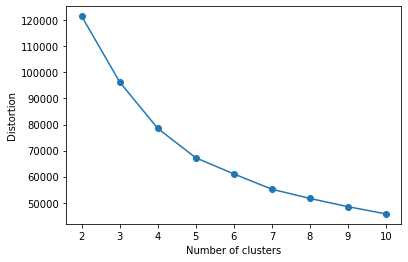

In [13]:
distortions = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0)
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

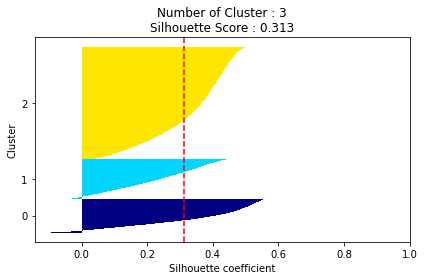

In [15]:
# k = 3
silhouetteViz(3, X_features_scaled)

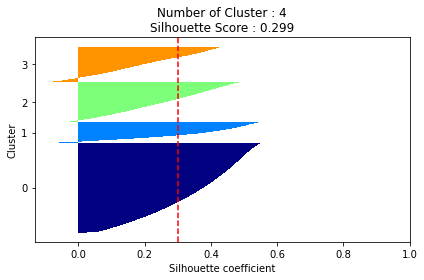

In [16]:
# k = 4
silhouetteViz(4, X_features_scaled)

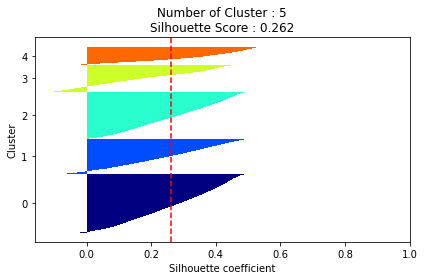

In [17]:
# k = 5
silhouetteViz(5, X_features_scaled)

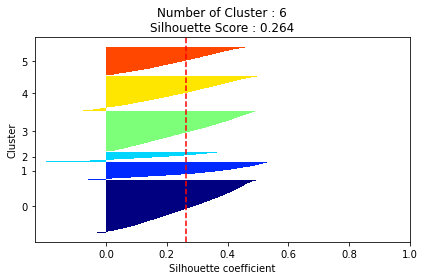

In [18]:
# k = 6
silhouetteViz(6, X_features_scaled)

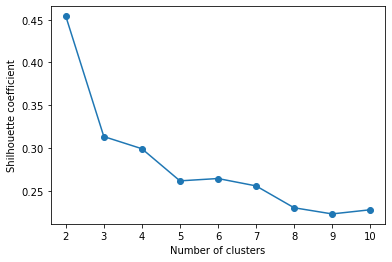

In [19]:
silhouette = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0)
    kmeans_i.fit(X_features_scaled)
    silhouette_values = silhouette_score(X_features_scaled, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,11), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [20]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

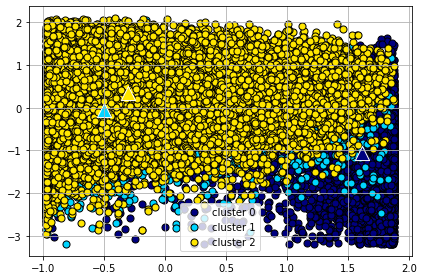

In [21]:
clusterScatter(3, X_features_scaled)

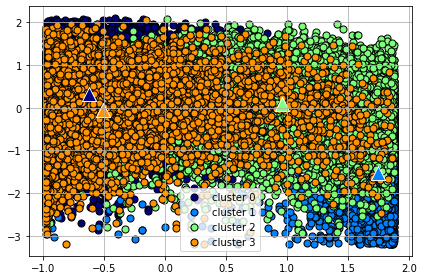

In [22]:
clusterScatter(4, X_features_scaled)

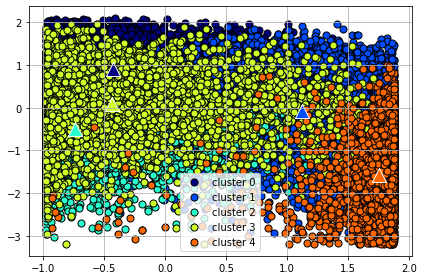

In [23]:
clusterScatter(5, X_features_scaled)

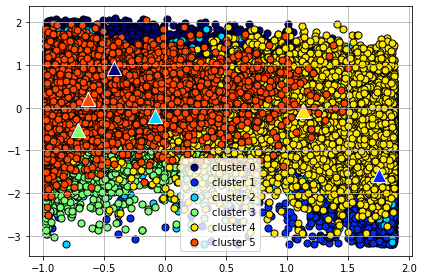

In [24]:
clusterScatter(6, X_features_scaled)

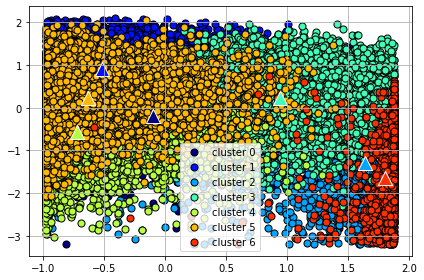

In [25]:
clusterScatter(7, X_features_scaled)

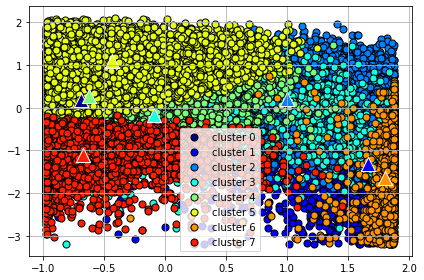

In [26]:
clusterScatter(8, X_features_scaled)

# Working with Clustered Data

In [27]:
newdata = data.copy()
print(newdata.shape)
newdata.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [28]:
# Drop columns and filter out rows with misleading value(s)
newdata.drop(columns=['key','mode','speechiness','obtained_date','valence'], axis=1, inplace=True)
newdata.drop(newdata[newdata["duration_ms"] <= 0].index, inplace=True)
newdata['loudness'] = newdata['loudness'] - newdata['loudness'].min()
print(newdata.shape)

(45066, 13)


In [29]:
# process number data (convert to float to cover wrong string values)
num_cols = list(df.columns) + ['popularity', 'tempo']
for col in num_cols:
    newdata[col] = newdata[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
newdata[num_cols] = newdata[num_cols].astype("float")
print(newdata.shape)
newdata.head()

(45066, 13)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,40.003,115.002,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,42.429,127.994,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,42.548,128.014,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,40.780,145.036,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.85400,0.216,36.529,NaN,Electronic


In [30]:
# apply logarithm, drop rows with missing values, and reset index
newdata[num_cols] = newdata[num_cols].apply(lambda x: np.log1p(x))
newdata = newdata.dropna()
newdata.reset_index(drop=True, inplace=True)
print(newdata.shape)
newdata.head()

(40560, 13)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,music_genre
0,46652.0,Thievery Corporation,The Shining Path,3.465736,0.012620,0.483660,218293.0,0.636577,0.950000,0.116894,3.713645,4.753607,Electronic
1,30097.0,Dillon Francis,Hurricane,3.367296,0.003055,0.482426,215613.0,0.562469,0.011800,0.427879,3.771127,4.859766,Electronic
2,62177.0,Dubloadz,Nitro,3.555348,0.025083,0.573237,166875.0,0.530628,0.002530,0.145830,3.773864,4.859921,Electronic
3,24907.0,What So Not,Divide & Conquer,3.496508,0.004639,0.493476,222369.0,0.461845,0.909000,0.145830,3.732418,4.983853,Electronic
4,43760.0,Jordan Comolli,Clash,3.850148,0.028490,0.452349,214408.0,0.589452,0.000008,0.100750,3.778537,5.017247,Electronic


In [31]:
# df.columns = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness']
X_features = newdata[df.columns].values
X_features_scaled = StandardScaler().fit_transform(X_features)

### No. of Clusters = 3

In [32]:
def cluster_songs(n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(X_features_scaled)
    cluster_map = newdata.copy()
    cluster_map['cluster'] = km.labels_
    print(cluster_map.shape)
    return cluster_map
    
cluster_map = cluster_songs(3)

(40560, 14)


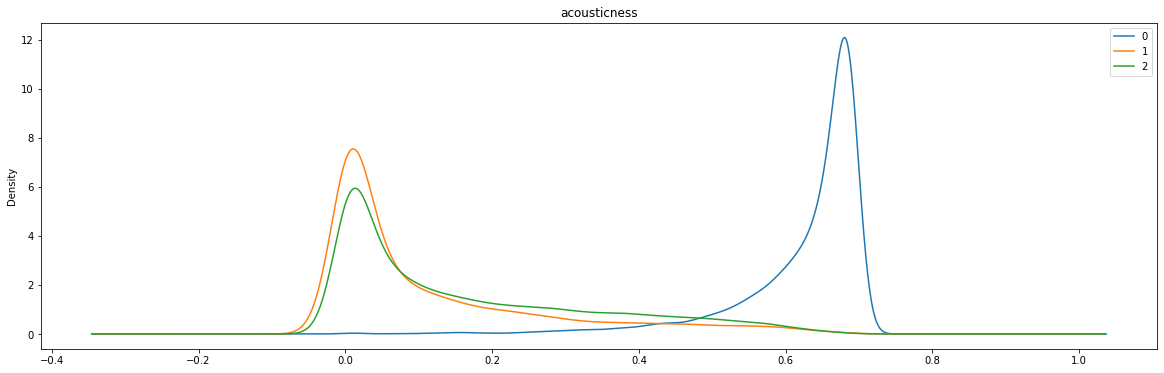

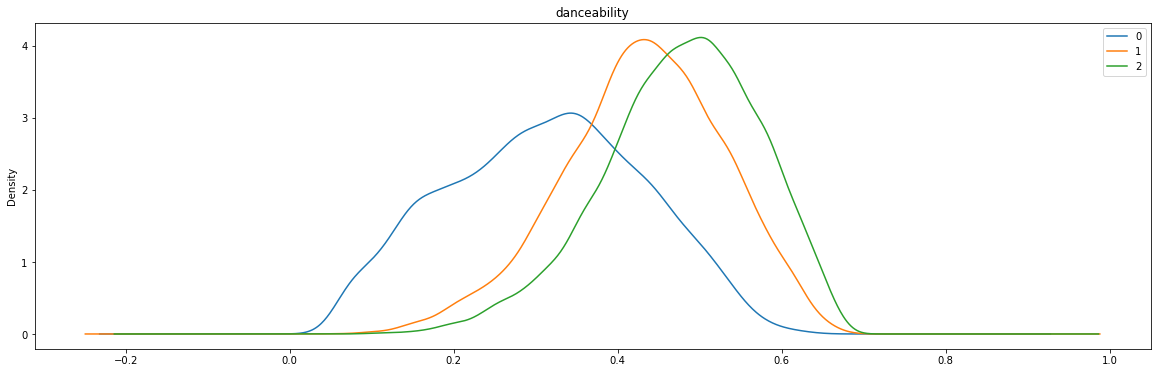

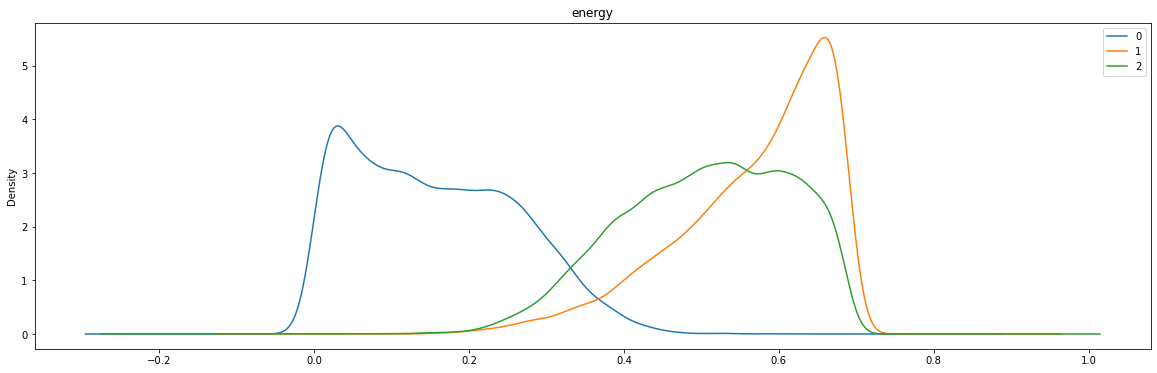

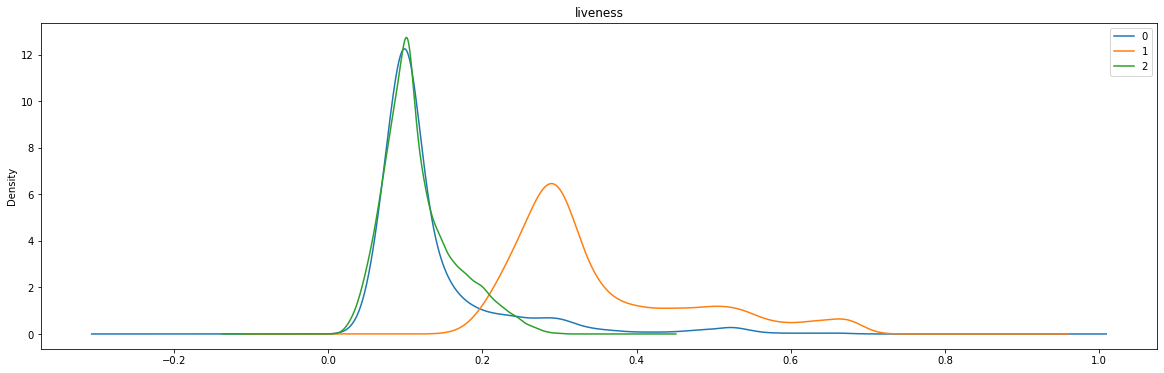

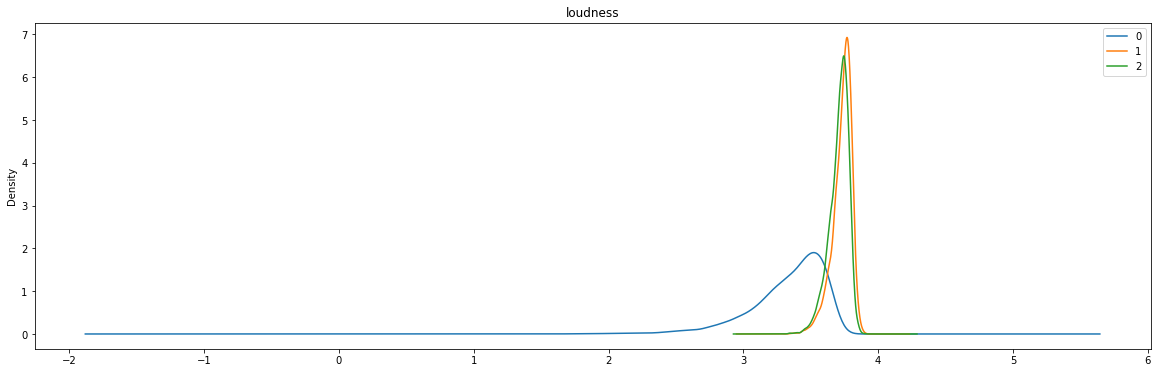

In [33]:
for feature in df.columns:
    fig, ax = plt.subplots(figsize=(20,6))
    for label, d in cluster_map.groupby('cluster'):
        d[feature].plot(kind="kde", ax=ax, label=label, title=feature)
    plt.legend()

(All descriptions below are in RELATIVE terms)
* Cluster 0: high acousticness, mid danceability, low-mid energy, high liveness, low loudness
* Cluster 1: mid acousticness, high danceability, high energy, mid liveness, high loudness
* Cluster 2: mid acousticness, high danceability, low energy, high liveness, high loudness

### Cluster 0 -----> "잔잔한"
### Cluster 1 -----> "신나는 댄스"
### Cluster 2 -----> "그루비, 모던 감성"

In [34]:
# 각 새로운 장르별로 가장 인기있는 노래/앨범 순으로 정렬한 뒤 상위 100개 저장 
# 아무래도 특정 장르를 가장 잘 나타내는 노래들을 보려면 가장 인기있는 노래를 가져오는게 좋다고 판단함
c0_lowbeat = cluster_map[cluster_map.cluster==0].sort_values(by=['popularity'], ascending=False).head(100)
c1_dance = cluster_map[cluster_map.cluster==1].sort_values(by=['popularity'], ascending=False).head(100)
c2_groovy = cluster_map[cluster_map.cluster==2].sort_values(by=['popularity'], ascending=False).head(100)

new_genres = {1:"잔잔한 어쿠스틱", 2:"신나는 댄스", 3:"그루비/감성"}
for i in new_genres:
    print(f"{i}. {new_genres[i]}")
genre_pref = int(input(f"듣고싶은 음악과 가장 가까운 설명에 해당하는 번호를 입력해주세요.\n답: ")) # 클러스터 선택
if genre_pref == 1:
    main_genre, sub_genre = c0_lowbeat, c0_lowbeat.music_genre.unique()
elif genre_pref == 2:
    main_genre, sub_genre = c1_dance, c1_dance.music_genre.unique()
elif genre_pref == 3:
    main_genre, sub_genre = c2_groovy, c2_groovy.music_genre.unique()

1. 잔잔한 어쿠스틱
2. 신나는 댄스
3. 그루비/감성
듣고싶은 음악과 가장 가까운 설명에 해당하는 번호를 입력해주세요.
답: 3


In [35]:
def arrange_playlist(main_genre, sub_genre, num):
    print(f"\n아래 중 가장 좋아하는 장르는 무엇인가요? \n정확한 철자로 입력해주세요 ")
    for i in sub_genre:
        print(f"\t- {i}")
    sub_genre_pref = input("답: ")
    funneled = main_genre[main_genre.music_genre==sub_genre_pref]
    
    fav_artist_list = set()
    while len(funneled) < num:
        # 클러스터의 가수 리스트에서 좋아하는 가수 선택
        artists = list(set(main_genre.artist_name.unique().flatten()).difference(fav_artist_list))[:10]
        print(f"\n다음 중 좋아하는 아티스트가 있다면 아티스트 이름을 (철자 주의),\n없다면 \'X\'를 입력해주세요.\n")
        for artist in artists:
            print(artist)
        fav_artist = input("\n답: ")
        if fav_artist == "X": break
        else:
            fav_artist_list.add(fav_artist)
            funneled = funneled.append(newdata[newdata.artist_name==fav_artist].sample(3)) # 해당 가수 노래 랜덤 3개 추가

            # 해당 가수의 주 장르의 인기 노래 3개 추가 (해당 가수의 노래는 제외)
            fav_artist_genre = newdata[newdata.artist_name==fav_artist].music_genre.mode()[0] 
            funneled = funneled.append(newdata[(newdata.artist_name!=fav_artist) & (newdata.music_genre==fav_artist_genre)].sort_values(by=['popularity'], ascending=False)[:3]) 
        # 루프 돌기 전 drop duplicates
        funneled = funneled.drop_duplicates()

    popularity_pref = int(input("\n\n\"나는 주로 대중적인 음악을 좋아한다.\"\n\n위 문장이 본인의 취향을 매우 잘 반영한다면 1, 어느정도 반영한다면 2, 전혀 그렇지 않다면 3을 입력해주세요.\n답: "))
    if popularity_pref == 1:
        picked = funneled.head(num)[['artist_name','track_name','duration_ms']]
    elif popularity_pref == 2:
        picked = funneled[len(funneled)//2:(len(funneled)//2)+num][['artist_name','track_name','duration_ms']]
    elif popularity_pref == 3:
        picked = funneled.tail(num)[['artist_name','track_name','duration_ms']]
    return picked

def print_playlist(picked):
    print(f"\n\n\t🎶 당신을 위한 추천 플레이리스트 입니다 🎶\n\n")
    i = 1
    for song in picked.values:
        m, s = int(song[2])//60000, str(song[2]%60000)[:2]
        print(f"{i}. {song[0]}의 {song[1]} ({m}:{s})\n")
        i += 1

In [36]:
print_playlist(arrange_playlist(main_genre, sub_genre, 10))


아래 중 가장 좋아하는 장르는 무엇인가요? 
정확한 철자로 입력해주세요 
	- Rap
	- Electronic
	- Hip-Hop
	- Rock
	- Country
답: Hip-Hop


"나는 주로 대중적인 음악을 좋아한다."

위 문장이 본인의 취향을 매우 잘 반영한다면 1, 어느정도 반영한다면 2, 전혀 그렇지 않다면 3을 입력해주세요.
답: 2


	🎶 당신을 위한 추천 플레이리스트 입니다 🎶


1. Kodak Black의 Calling My Spirit (2:32)

2. Tory Lanez의 TAlk tO Me (with Rich The Kid feat. Lil Wayne) - Remix (4:85)

3. Logic의 1-800-273-8255 (4:10)

4. J. Cole의 No Role Modelz (4:52)

5. DJ Khaled의 No Brainer (4:20)

6. Future의 Crushed Up (2:29)

7. Lil Peep의 I've Been Waiting (w/ ILoveMakonnen & Fall Out Boy) (3:53)

8. Logic의 Everyday (3:24)

9. Lil Pump의 Butterfly Doors (2:12)

10. XXXTENTACION의 Hope (1:50)



### No. of clusters = 4

(40560, 14)


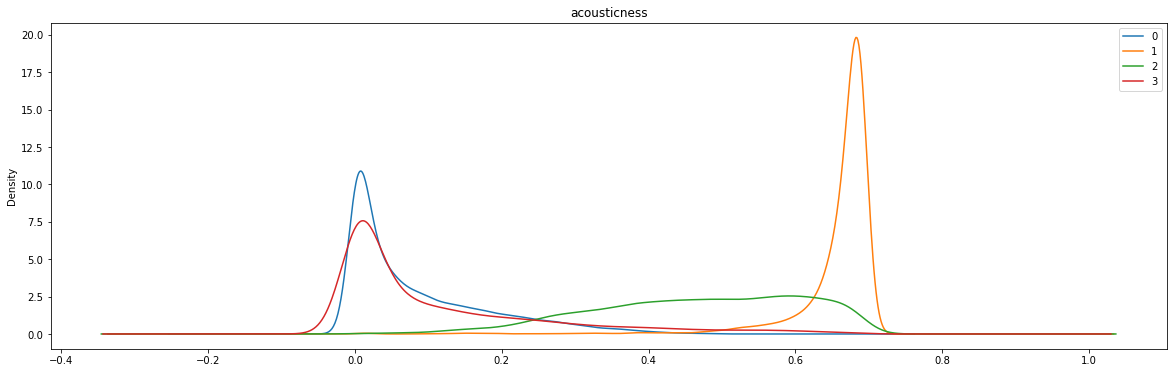

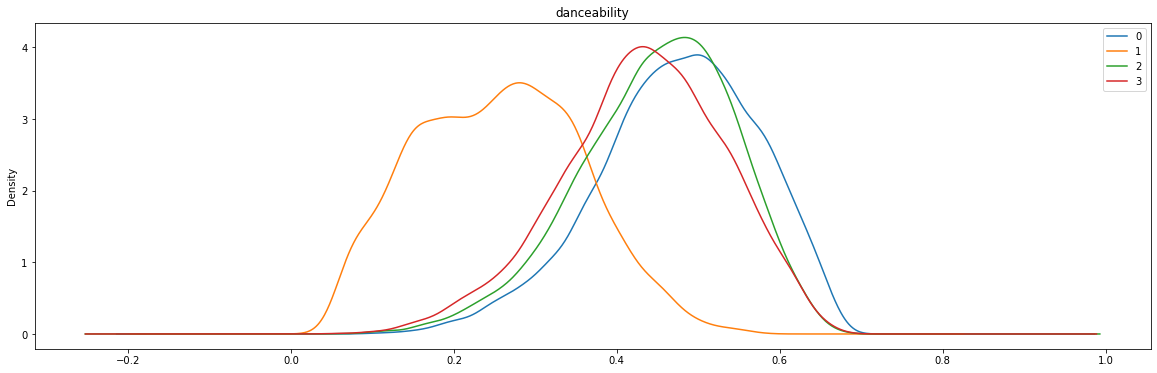

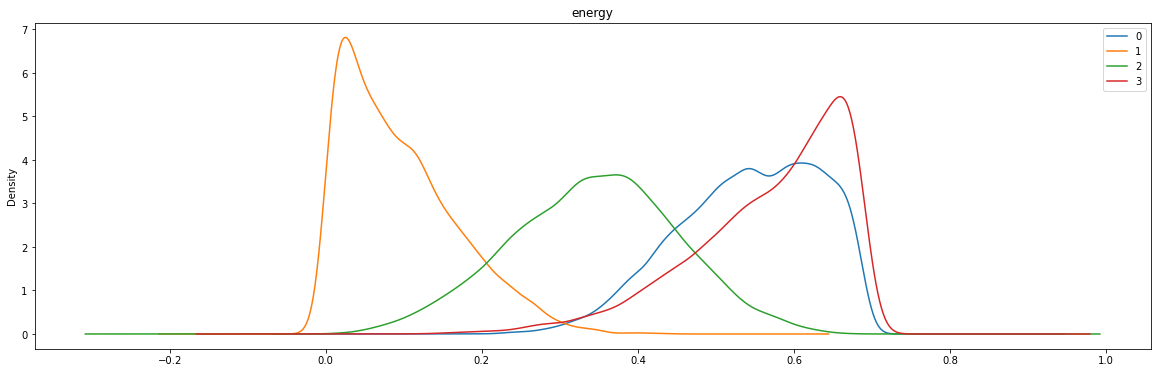

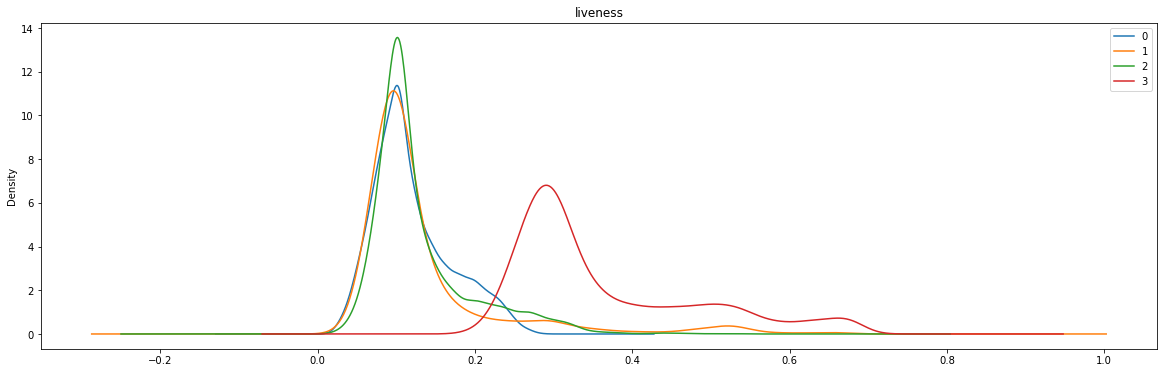

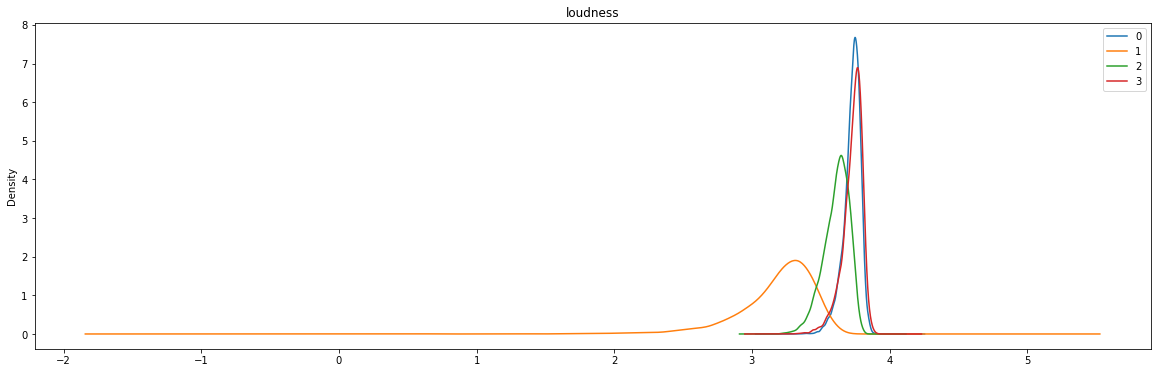

In [37]:
cluster_map = cluster_songs(4)

for feature in df.columns:
    fig, ax = plt.subplots(figsize=(20,6))
    for label, d in cluster_map.groupby('cluster'):
        d[feature].plot(kind="kde", ax=ax, label=label, title=feature)
    plt.legend()

(All descriptions below are in RELATIVE terms)
* Cluster 0: mid acousticness, high danceability, low energy, high liveness, high loudness
* Cluster 1: high acousticness, mid danceability, high energy, high liveness, low loudness
* Cluster 2: low acousticness, high danceability, low energy, very high liveness, mid loudness
* Cluster 3: mid acousticness, high danceability, mid energy, low liveness, high loudness

Cluster 0 --> "따뜻한, 업비트"

Cluster 1 --> "기분 좋은, 통통 튀는"

Cluster 2 --> "감성, 로맨틱, 모던"

Cluster 3 --> "신나는, 자유로운"

In [38]:
c0_upbeat = cluster_map[cluster_map.cluster==0].sort_values(by=['popularity'], ascending=False).head(100)
c1_feelgood = cluster_map[cluster_map.cluster==1].sort_values(by=['popularity'], ascending=False).head(100)
c2_romantic = cluster_map[cluster_map.cluster==2].sort_values(by=['popularity'], ascending=False).head(100)
c3_free = cluster_map[cluster_map.cluster==3].sort_values(by=['popularity'], ascending=False).head(100)

new_genres = {1:"따뜻한, 업비트", 2:"기분 좋은, 통통 튀는", 3:"감성, 로맨틱, 모던", 4:"신나는/자유로운"}
for i in new_genres:
    print(f"{i}. {new_genres[i]}")
genre_pref = int(input(f"위 중 가장 즐겨듣는 음악과 가장 가까운 설명에 해당하는 번호를 입력해주세요.\n답: "))
if genre_pref == 1: 
    main_genre, sub_genre = c0_upbeat, c0_upbeat.music_genre.unique()
elif genre_pref == 2:
    main_genre, sub_genre = c1_feelgood, c1_feelgood.music_genre.unique()
elif genre_pref == 3:
    main_genre, sub_genre = c2_romantic, c2_romantic.music_genre.unique()
elif genre_pref == 4:
    main_genre, sub_genre = c3_free, c3_free.music_genre.unique()

1. 따뜻한, 업비트
2. 기분 좋은, 통통 튀는
3. 감성, 로맨틱, 모던
4. 신나는/자유로운
위 중 가장 즐겨듣는 음악과 가장 가까운 설명에 해당하는 번호를 입력해주세요.
답: 3


In [39]:
print_playlist(arrange_playlist(main_genre, sub_genre, 10))


아래 중 가장 좋아하는 장르는 무엇인가요? 
정확한 철자로 입력해주세요 
	- Rap
	- Hip-Hop
	- Rock
	- Country
	- Alternative
	- Blues
답: Rock


"나는 주로 대중적인 음악을 좋아한다."

위 문장이 본인의 취향을 매우 잘 반영한다면 1, 어느정도 반영한다면 2, 전혀 그렇지 않다면 3을 입력해주세요.
답: 1


	🎶 당신을 위한 추천 플레이리스트 입니다 🎶


1. Toto의 Africa (4:55)

2. Jason Mraz의 I'm Yours (4:21)

3. Ben E. King의 Stand by Me (3:56)

4. Jason Mraz의 Lucky (3:11)

5. John Denver의 Take Me Home, Country Roads - Rerecorded (3:17)

6. Elvis Presley의 Can't Help Falling in Love (2:59)

7. James Blunt의 You're Beautiful (3:29)

8. Tracy Chapman의 Fast Car (4:56)

9. empty_field의 A Horse with No Name (4:12)

10. Kansas의 Dust in the Wind (3:26)

